In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [6]:
#import the requets library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=db1bbe417f9305121b331358b549863b


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | kavieng
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | port-gentil
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | pekalongan
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | usogorsk
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | bilma
Processing Record 14 of Set 1 | vardo
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | sur
Processing Record 17 of Set 1 | valparaiso
Processing Record 18 of Set 1 | faanui
Processing Record 19 of Set 1 | norman wells
Processing Record 20 of Set 1 | chapais
Processing Record 21 of Set 1 | hilo
Processing Record 22 of Set 1 | lorengau
Processing Record 23 of Set 1 | wanaka
Processing Record 24 of Set 1 | avarua
Processing 

Processing Record 40 of Set 4 | banda aceh
Processing Record 41 of Set 4 | paka
Processing Record 42 of Set 4 | riyadh
Processing Record 43 of Set 4 | teguise
Processing Record 44 of Set 4 | lakes entrance
Processing Record 45 of Set 4 | flinders
Processing Record 46 of Set 4 | higuey
City not found. Skipping...
Processing Record 47 of Set 4 | aktash
Processing Record 48 of Set 4 | astana
Processing Record 49 of Set 4 | yantal
Processing Record 50 of Set 4 | dikson
Processing Record 1 of Set 5 | fairbanks
Processing Record 2 of Set 5 | adrar
Processing Record 3 of Set 5 | galle
Processing Record 4 of Set 5 | vanavara
Processing Record 5 of Set 5 | san jose
Processing Record 6 of Set 5 | grand gaube
Processing Record 7 of Set 5 | shaunavon
Processing Record 8 of Set 5 | codrington
Processing Record 9 of Set 5 | cayenne
Processing Record 10 of Set 5 | ardistan
City not found. Skipping...
Processing Record 11 of Set 5 | ambon
Processing Record 12 of Set 5 | sorland
Processing Record 13 of

Processing Record 30 of Set 8 | trois-rivieres
Processing Record 31 of Set 8 | wageningen
Processing Record 32 of Set 8 | pyapon
Processing Record 33 of Set 8 | fauske
Processing Record 34 of Set 8 | angoche
Processing Record 35 of Set 8 | locri
Processing Record 36 of Set 8 | athabasca
Processing Record 37 of Set 8 | tual
Processing Record 38 of Set 8 | roald
Processing Record 39 of Set 8 | vredendal
Processing Record 40 of Set 8 | awjilah
Processing Record 41 of Set 8 | sabang
Processing Record 42 of Set 8 | chernyshevskiy
Processing Record 43 of Set 8 | acurenam
Processing Record 44 of Set 8 | fougamou
Processing Record 45 of Set 8 | aginskoye
Processing Record 46 of Set 8 | vanimo
Processing Record 47 of Set 8 | kedrovyy
Processing Record 48 of Set 8 | boda
Processing Record 49 of Set 8 | tateyama
Processing Record 50 of Set 8 | constitucion
Processing Record 1 of Set 9 | uhlove
Processing Record 2 of Set 9 | languyan
Processing Record 3 of Set 9 | bentiu
Processing Record 4 of Set

Processing Record 24 of Set 12 | griffith
Processing Record 25 of Set 12 | port-cartier
Processing Record 26 of Set 12 | bunia
Processing Record 27 of Set 12 | dolbeau
City not found. Skipping...
Processing Record 28 of Set 12 | aklavik
Processing Record 29 of Set 12 | uyemskiy
Processing Record 30 of Set 12 | bargal
City not found. Skipping...
Processing Record 31 of Set 12 | amatlan
City not found. Skipping...
Processing Record 32 of Set 12 | chimoio
Processing Record 33 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 34 of Set 12 | eyl
Processing Record 35 of Set 12 | rio grande
Processing Record 36 of Set 12 | hofn
Processing Record 37 of Set 12 | gainesville
Processing Record 38 of Set 12 | diamantino
Processing Record 39 of Set 12 | borborema
Processing Record 40 of Set 12 | katav-ivanovsk
Processing Record 41 of Set 12 | port augusta
Processing Record 42 of Set 12 | college
Processing Record 43 of Set 12 | getulio vargas
Processing Record 44 of Set 12 | byron 

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.74,-90.35,73.99,92,47,1.01,EC,2020-05-23 05:16:31
1,Kavieng,-2.57,150.80,84.20,76,28,5.46,PG,2020-05-23 05:18:20
2,Port Alfred,-33.59,26.89,61.00,92,97,3.00,ZA,2020-05-23 05:16:26
3,Port-Gentil,-0.72,8.78,80.53,85,0,12.24,GA,2020-05-23 05:18:20
4,Mataura,-46.19,168.86,47.98,90,93,1.28,NZ,2020-05-23 05:16:23
5,Pekalongan,-6.89,109.68,87.01,66,12,7.02,ID,2020-05-23 05:18:21
6,Lebu,-37.62,-73.65,50.56,65,91,6.85,CL,2020-05-23 05:16:38
7,Kodiak,57.79,-152.41,48.20,70,90,5.82,US,2020-05-23 05:16:27
8,Rikitea,-23.12,-134.97,70.38,70,98,20.51,PF,2020-05-23 05:16:31
9,Hermanus,-34.42,19.23,57.99,72,0,8.88,ZA,2020-05-23 05:16:27


In [16]:
#Correct the column order.
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed',]

city_data_df=city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Ayora,EC,2020-05-23 05:16:31,-0.74,-90.35,73.99,92,47,1.01
1,Kavieng,PG,2020-05-23 05:18:20,-2.57,150.80,84.20,76,28,5.46
2,Port Alfred,ZA,2020-05-23 05:16:26,-33.59,26.89,61.00,92,97,3.00
3,Port-Gentil,GA,2020-05-23 05:18:20,-0.72,8.78,80.53,85,0,12.24
4,Mataura,NZ,2020-05-23 05:16:23,-46.19,168.86,47.98,90,93,1.28
...,...,...,...,...,...,...,...,...,...
550,Half Moon Bay,US,2020-05-23 05:17:18,37.46,-122.43,57.20,81,1,6.93
551,Gaoual,GN,2020-05-23 05:18:05,11.75,-13.20,77.29,70,27,3.74
552,Selma,US,2020-05-23 05:19:35,36.57,-119.61,71.60,34,3,4.70
553,Richards Bay,ZA,2020-05-23 05:16:42,-28.78,32.04,61.86,86,0,5.66


In [17]:
# Create the output file.csv.
output_data_file= "weather_data/cities.csv"

#Export the city data into a csv.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# EPlot Latitude vs. Temperature

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats=city_data_df['Lat']
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [21]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1590214171.6880631

In [22]:
today=time.strftime('%x')
today

'05/23/20'

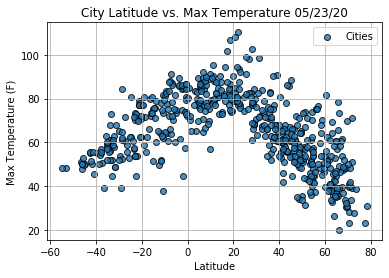

In [26]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.legend()

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

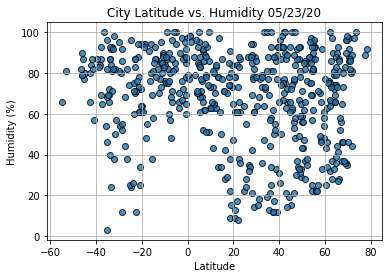

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

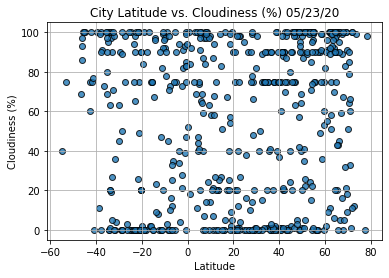

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()